<a href="https://colab.research.google.com/github/sames12421/iris_using_learning/blob/main/iris_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split   #
from sklearn.preprocessing import LabelEncoder  #cat to numerical value
import matplotlib.pyplot as plt #visulaization
from tensorflow.keras.models import Sequential # sequences
from tensorflow.keras.layers import Dense #num of layer of neuron
from tensorflow.keras.optimizers import Adam #reduce loss function

In [ ]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [ ]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y=tf.keras.utils.to_categorical(y,num_classes=3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
l_r=[0.001,0.01,0.1]
batch_sizes=[16,32]

Learning Rate: 0.001, Batch Size: 16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


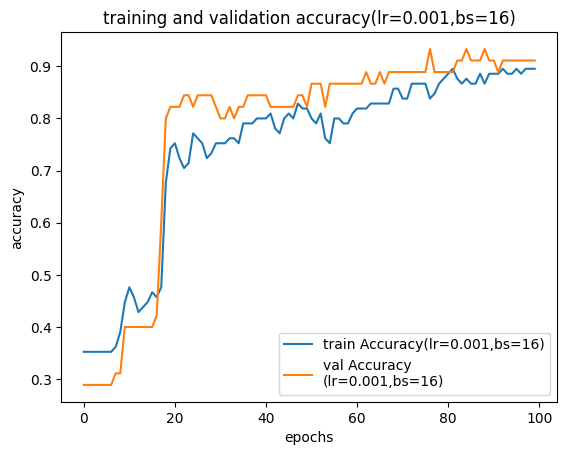

Learning Rate: 0.001, Batch Size: 32


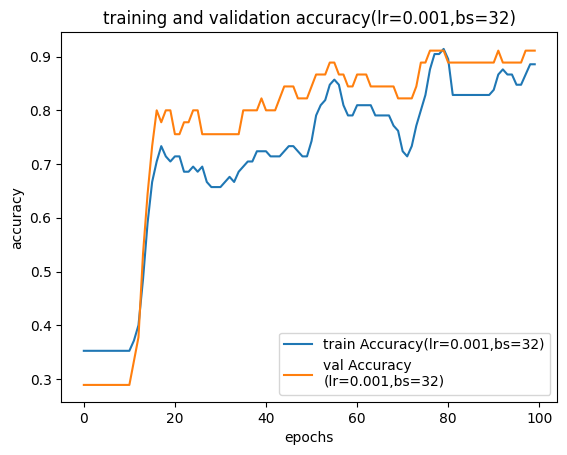

Learning Rate: 0.01, Batch Size: 16


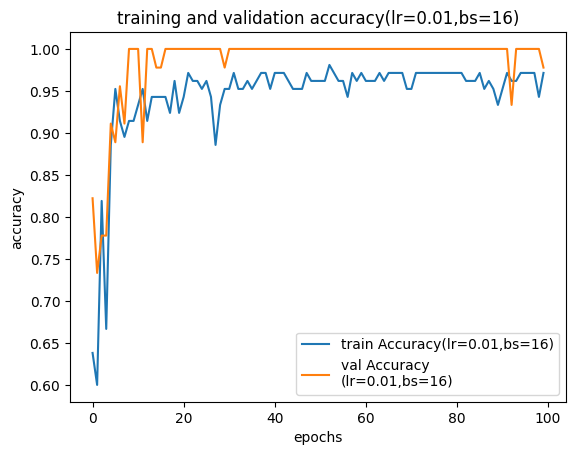

Learning Rate: 0.01, Batch Size: 32


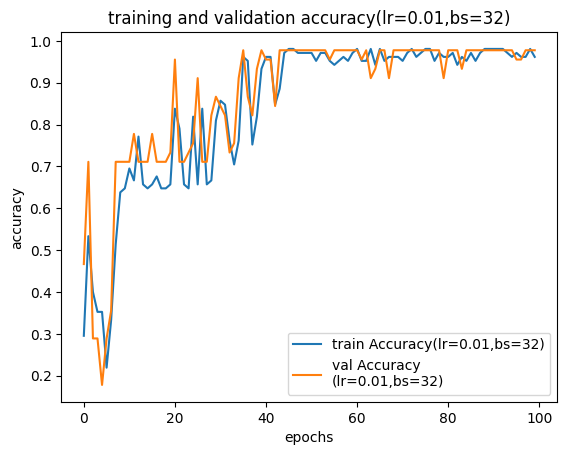

Learning Rate: 0.1, Batch Size: 16


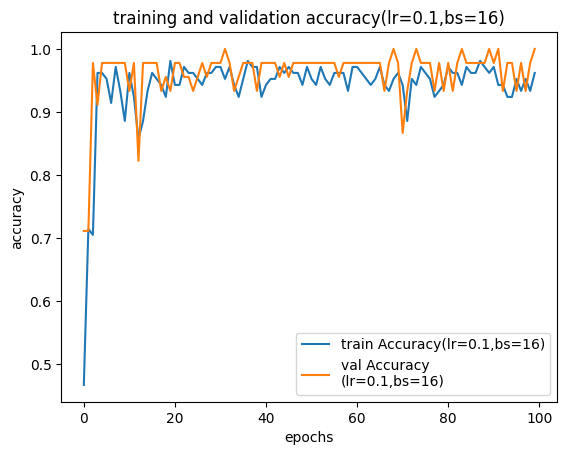

Learning Rate: 0.1, Batch Size: 32


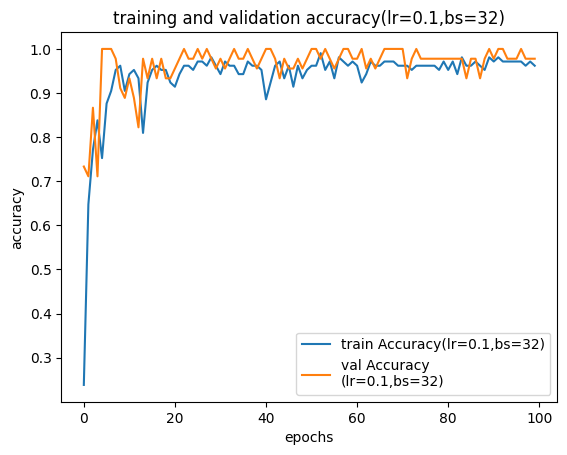

In [ ]:
#loop over different learning rate and batch _sizes
for lr in l_r:
  for batch_size in batch_sizes:
    print(f"Learning Rate: {lr}, Batch Size: {batch_size}")
    model=Sequential()
    model.add(Dense(10,input_shape=(4,),activation='relu')) #input layer with 4 features
    model.add(Dense(3,activation='softmax'))#output layer with 3 categories
    #compile the model with current learning rate
    # The change is here. lr is used instead of l_r
    optimizer = Adam(lr)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    #training the model
    history=model.fit(x_train,y_train,epochs=100,batch_size=batch_size,validation_data=(x_test,y_test),verbose=0)
    plt.plot(history.history['accuracy'],label=f'train Accuracy(lr={lr},bs={batch_size})')
    plt.plot(history.history['val_accuracy'],label=f'val Accuracy\n(lr={lr},bs={batch_size})')
    plt.title(f'training and validation accuracy(lr={lr},bs={batch_size})')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()